In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar

In [ ]:
file_path = "/content/Daily Household Transactions (1).csv"  # Change if needed
df = pd.read_csv(file_path)
df.head(10)

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,9/20/2018,Cash,Transportation,Train,2 Place 5 to Place 0,₹30.00,Expense,INR
1,9/20/2018,Cash,Food,snacks,Idli medu Vada mix 2 plates,₹60.00,Expense,INR
2,9/19/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,₹199.00,Expense,INR
3,9/17/2018,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,₹19.00,Expense,INR
4,9/16/2018,Cash,Festivals,Ganesh Pujan,Ganesh idol,₹251.00,Expense,INR
5,9/15/2018,Credit Card,subscription,Tata Sky,Permanent Residence - Tata Play recharge,₹200.00,Expense,INR
6,9/14/2018,Cash,Transportation,auto,Place 2 station to Permanent Residence,₹50.00,Expense,INR
7,9/13/2018,Saving Bank account 1,Transportation,Train,2 Place 0 to Place 3,₹40.00,Expense,INR
8,9/13/2018,Credit Card,Other,NaN,HBR 2 Months subscription,₹83.00,Expense,INR
9,9/13/2018,Cash,Food,Grocery,1kg atta,₹46.00,Expense,INR


In [ ]:
# Step 2: Handle missing values
# What: Check for missing values and fill/remove them
# Why: Missing data can affect analysis accuracy
df.dropna(how='all', inplace=True)  # Remove rows where all values are NaN
df.fillna({'Category': 'Unknown', 'Subcategory': 'Unknown'}, inplace=True)

In [ ]:
# Step 3: Convert data types & remove duplicates
# What: Ensure correct data types for each column
# Why: Proper types allow correct calculations & plots
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.drop_duplicates(inplace=True)

In [ ]:
# Step 4: Descriptive statistics
# What: Get a quick summary of numerical columns
# Why: Understand central tendency, spread, min/max
print(df.describe())

                                Date
count                           2450
mean   2017-04-03 10:15:58.040816384
min              2015-01-01 00:00:00
25%              2016-10-15 12:00:00
50%              2017-06-24 12:00:00
75%              2018-01-16 00:00:00
max              2018-09-20 00:00:00


In [ ]:
print(df.columns.tolist())

['Date', 'Mode', 'Category', 'Subcategory', 'Note', ' Amount ', 'Income/Expense', 'Currency']


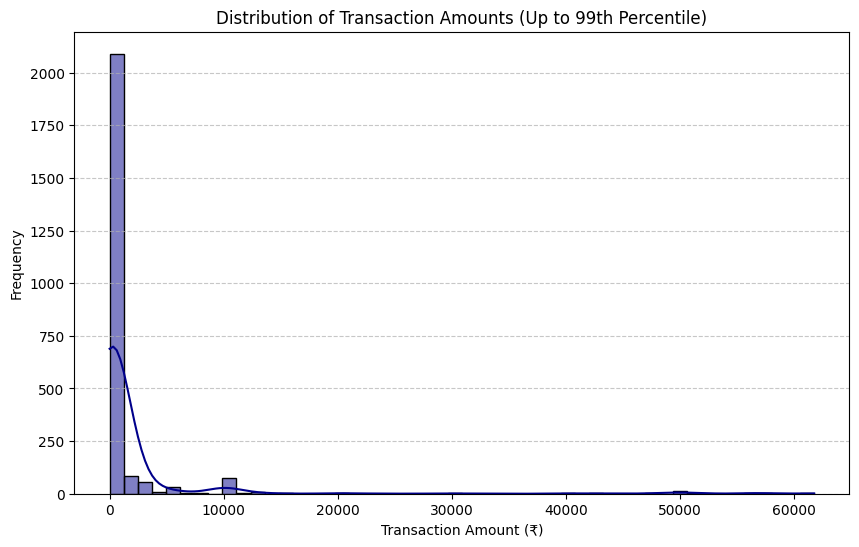

In [ ]:
# Step 5: Distribution of transaction amounts
# What: Plot histogram of amounts
# Why: To see most common transaction sizes
# Assuming df['Amount'] has the data
# 1. Convert to numeric & drop NaN
# Remove ₹ and commas, convert to float
df['Amount'] = df['Amount'].replace({'₹': '', ',': ''}, regex=True).astype(float)

amounts = df['Amount']

plt.figure(figsize=(10,6))

# Limit x-axis to 99th percentile to avoid extreme outliers
upper_limit = np.percentile(amounts, 99)

sns.histplot(amounts[amounts <= upper_limit], bins=50, kde=True, color="darkblue")

plt.title("Distribution of Transaction Amounts (Up to 99th Percentile)")
plt.xlabel("Transaction Amount (₹)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

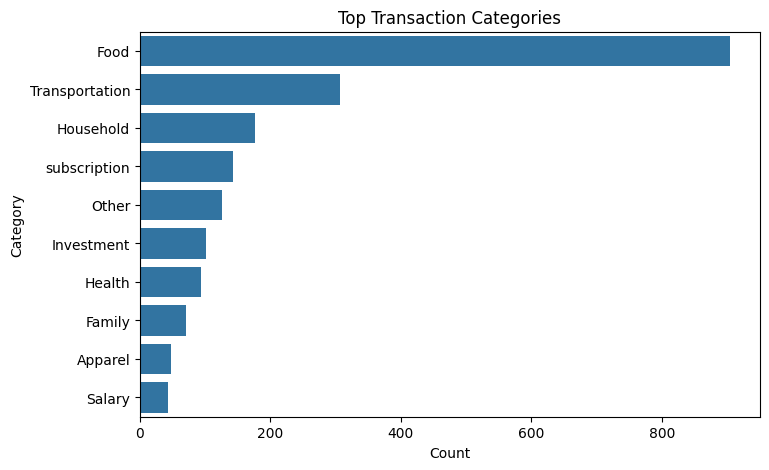

In [ ]:
# Step 6: Top categories & subcategories
# What: Find the most frequent categories
# Why: Identify where money is spent most
top_cats = df['Category'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_cats.values, y=top_cats.index)
plt.title('Top Transaction Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

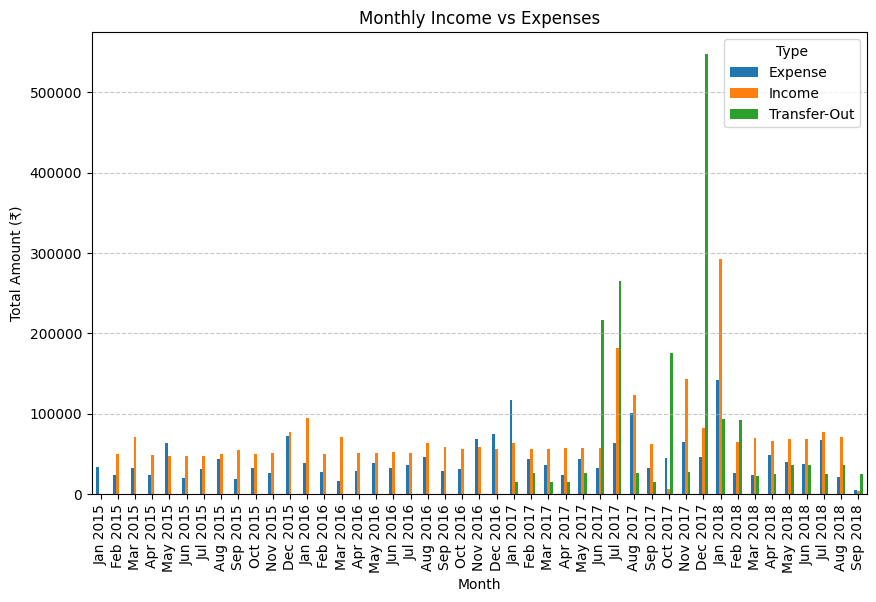

In [ ]:
# Step 7: Income vs Expense trends
# What: Compare total monthly income & expenses
# Why: To see if spending exceeds income
# Step 1: Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Step 2: Clean Amount column
df['Amount'] = df['Amount'].replace({'₹': '', ',': ''}, regex=True).astype(float)

# Step 3: Extract Month and format as 'Jan 2019'
df['Month'] = df['Date'].dt.strftime('%b %Y')

# Step 4: Group by Month and Income/Expense
monthly_summary = df.groupby(['Month', 'Income/Expense'])['Amount'].sum().unstack(fill_value=0)

# Step 5: Ensure months are in correct order
month_order = pd.to_datetime(monthly_summary.index, format='%b %Y')
monthly_summary = monthly_summary.assign(MonthOrder=month_order).sort_values('MonthOrder')
monthly_summary = monthly_summary.drop(columns='MonthOrder')

# Step 6: Plot
monthly_summary.plot(kind='bar', figsize=(10,6))
plt.title('Monthly Income vs Expenses')
plt.xlabel('Month')
plt.ylabel('Total Amount (₹)')
plt.legend(title="Type")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

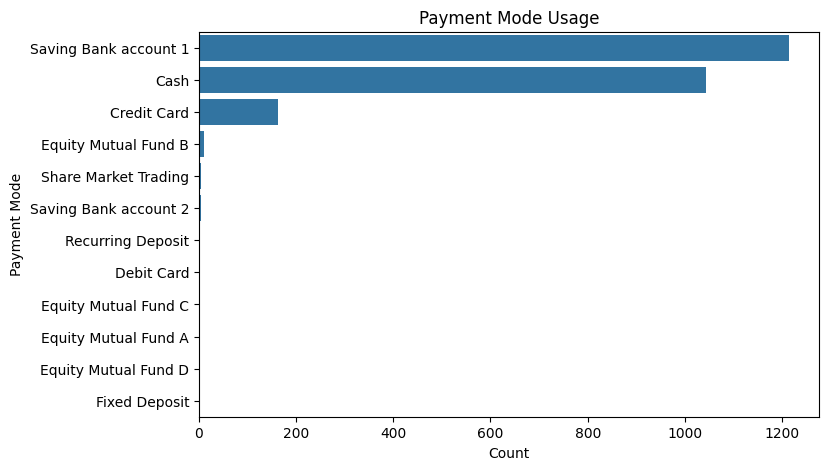

In [ ]:
# Step 8: Payment mode usage trends
# What: Count transactions by payment mode
# Why: Understand preferred modes
payment_counts = df['Mode'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=payment_counts.values, y=payment_counts.index)
plt.title('Payment Mode Usage')
plt.xlabel('Count')
plt.ylabel('Payment Mode')
plt.show()

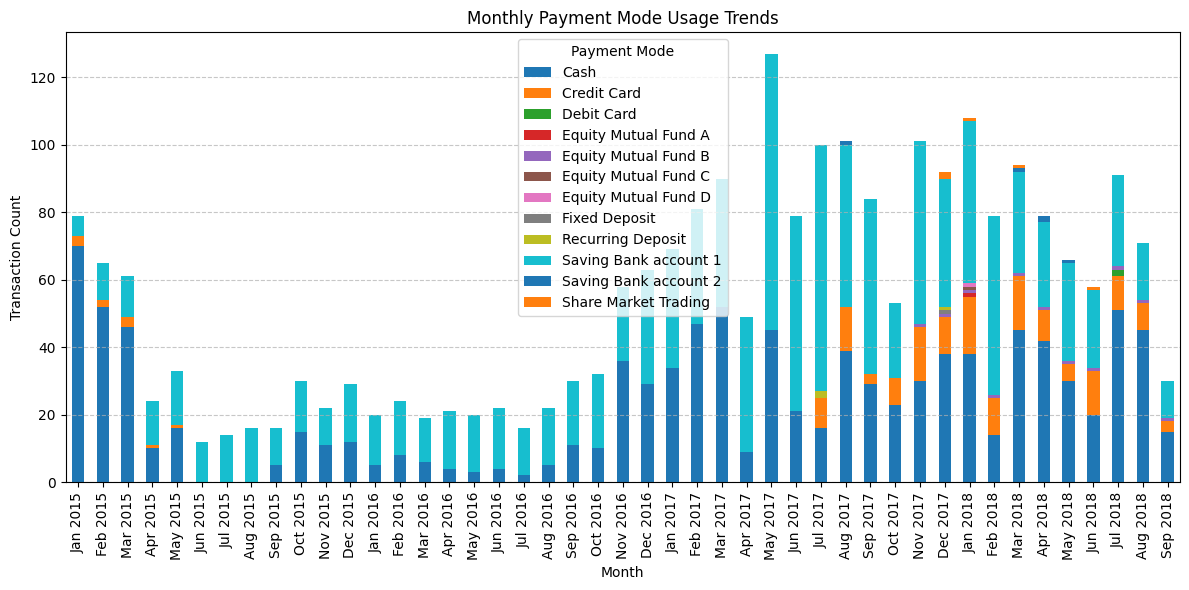

In [ ]:
# Step 10: Seasonal expense patterns
# What: Average spending by month
# Why: Detect seasonal variations
# Step 1: Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Step 2: Create Month column in "Jan 2019" format
df['Month'] = df['Date'].dt.strftime('%b %Y')

# Step 3: Group by Month & Mode
monthly_payment_counts = df.groupby(['Month', 'Mode']).size().unstack(fill_value=0)

# Step 4: Ensure months are in correct order
month_order = pd.to_datetime(monthly_payment_counts.index, format='%b %Y')
monthly_payment_counts = monthly_payment_counts.assign(MonthOrder=month_order).sort_values('MonthOrder')
monthly_payment_counts = monthly_payment_counts.drop(columns='MonthOrder')

# Step 5: Plot stacked bar chart
monthly_payment_counts.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Monthly Payment Mode Usage Trends')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.legend(title='Payment Mode')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

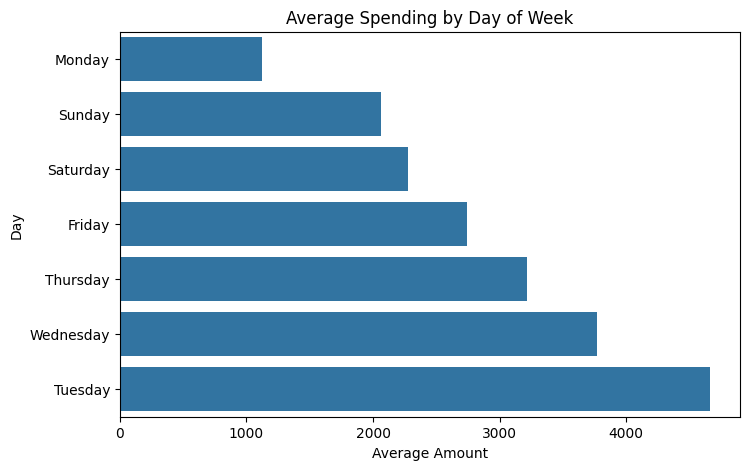

In [ ]:
df['DayOfWeek'] = df['Date'].dt.day_name()
avg_spend_per_day = df.groupby('DayOfWeek')['Amount'].mean().sort_values()
plt.figure(figsize=(8,5))
sns.barplot(x=avg_spend_per_day.values, y=avg_spend_per_day.index)
plt.title('Average Spending by Day of Week')
plt.xlabel('Average Amount')
plt.ylabel('Day')
plt.show()

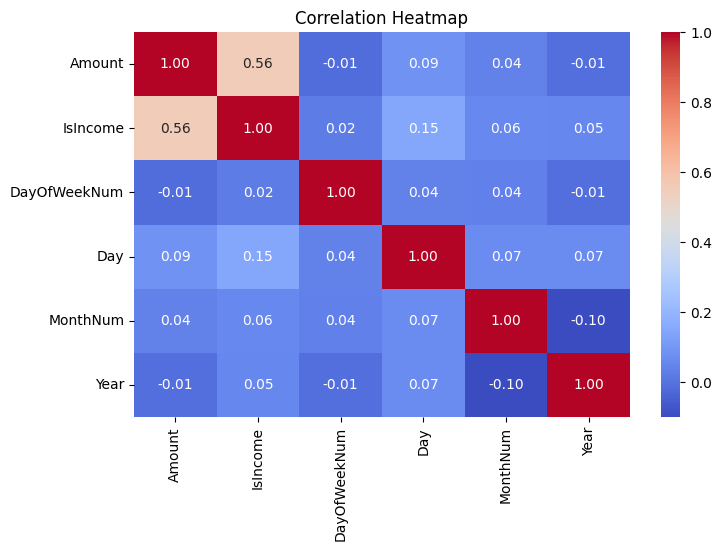

In [ ]:
# Step 11: Correlation analysis
# What: See relationships between numerical columns
# Why: Identify which factors move together

df_encoded = df.copy()
# Encode Income/Expense as 1 for Income, 0 for Expense
df_encoded['IsIncome'] = df_encoded['Income/Expense'].map({'Income': 1, 'Expense': 0})
# Encode DayOfWeek as numbers (Monday=0, Sunday=6)
df_encoded['DayOfWeekNum'] = pd.to_datetime(df_encoded['Date']).dt.weekday

df_encoded['Day'] = df_encoded['Date'].dt.day
df_encoded['MonthNum'] = df_encoded['Date'].dt.month
df_encoded['Year'] = df_encoded['Date'].dt.year

numeric_df = df_encoded.select_dtypes(include='number')

# Plot heatmap
plt.figure(figsize=(8,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

/tmp/ipython-input-178774650.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


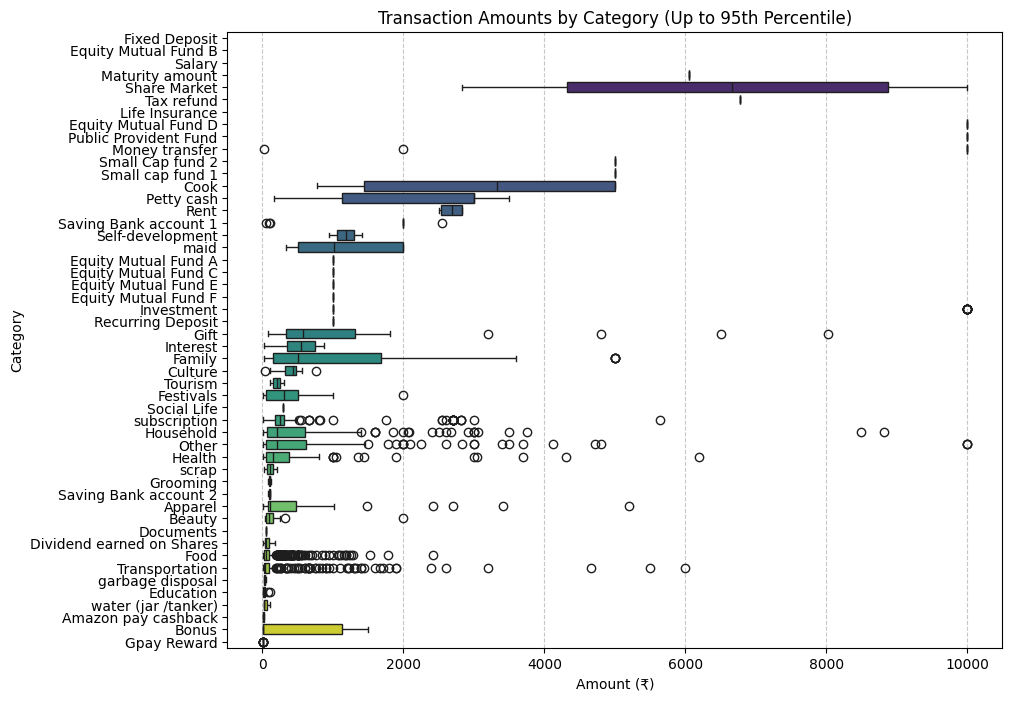

In [ ]:
# Step 12: Boxplot of amounts by category
# What: Show spread of spending per category
# Why: Identify outliers & high-cost categories
plt.figure(figsize=(10,8))

# Sort categories by median amount
order = df.groupby('Category')['Amount'].median().sort_values(ascending=False).index

# Limit y-axis by filtering out extreme outliers (optional)
q95 = df['Amount'].quantile(0.95)
filtered_df = df[df['Amount'] <= q95]

sns.boxplot(
    y='Category',
    x='Amount',
    data=filtered_df,
    order=order,
    palette='viridis'
)

plt.title('Transaction Amounts by Category (Up to 95th Percentile)')
plt.xlabel('Amount (₹)')
plt.ylabel('Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
